In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
from sklearn.neighbors import KNeighborsClassifier

# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Matplotlib: ', matplotlib.__version__)

Numpy:  1.19.2
Pandas:  1.1.3
Matplotlib:  3.3.2


In [2]:
import imblearn

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

# Load the DATA

In [4]:
#Read dataset train.csv and test.csv

df_1 = pd.read_csv(r'C:\Users\gurme\OneDrive\Documents\fraudTrain.csv\fraudTrain.csv')
df_1 = df_1.drop(df_1.columns[0], axis=1)

df_2 = pd.read_csv(r'C:\Users\gurme\OneDrive\Documents\fraudTest.csv\fraudTest.csv')
df_2 = df_2.drop(df_2.columns[0], axis=1)

df = pd.concat([df_1,df_2])

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# EDA and Feature Engineering

In [6]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [7]:
#Derive 'Transaction Hour' Feature from 'Transaction Time' Feature
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

In [8]:
#Derive 'Day of Week' Feature from 'Transaction Time' Feature
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [9]:
#Derive Age of the Customer:
#Age of Customer = Trasaction Date - DOB
df['dob'] = pd.to_datetime(df['dob'])

In [10]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0         31.0
1         41.0
2         57.0
3         52.0
4         33.0
          ... 
555714    55.0
555715    21.0
555716    39.0
555717    55.0
555718    28.0
Name: age, Length: 1852394, dtype: float64

In [11]:
df['age'].describe()

count    1.852394e+06
mean     4.626617e+01
std      1.741239e+01
min      1.400000e+01
25%      3.300000e+01
50%      4.400000e+01
75%      5.700000e+01
max      9.600000e+01
Name: age, dtype: float64

In [12]:
#One Hot-Encoding for Categorical features
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [13]:
#Merging the one hot encoding with the original dataset
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [14]:
#Calculating the distance between the Customer and the merchant from Latitude and longitude features
#Function to calculate the distance between two adress
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [15]:
#Calculating the distance between the Customer and the merchant from Latitude and longitude features
#concanate the lat and longitude of client into one column and the same for the merchant location
df1['lat_long'] = tuple(zip(*df1[['lat','long']].values.T))
df1['merch_ad'] = tuple(zip(*df1[['merch_lat','merch_long']].values.T))

#create the distance column
df1['distance'] = haversine_vectorize(df1['long'],df1['lat'],df1['merch_long'],df1['merch_lat'])

In [16]:
df1['distance'].describe()

count    1.852394e+06
mean     7.606394e+01
std      2.909869e+01
min      2.224054e-02
25%      5.528535e+01
50%      7.816727e+01
75%      9.844762e+01
max      1.520217e+02
Name: distance, dtype: float64

In [17]:
#Encoding Transaction hour between normal and abnormal hours.
df1['hourEnc'] = 0
df1.loc[df.trans_hour < 5,'hourEnc'] = 1
df1.loc[df.trans_hour > 21,'hourEnc'] = 1

In [18]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday,lat_long,merch_ad,distance,hourEnc
time_index,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,0,0,0,1,0,"(36.0788, -81.1781)","(36.011293, -82.048315)",78.548221,1
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,0,0,0,1,0,"(48.8878, -118.2105)","(49.159047, -118.186462)",30.193207,1
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,0,0,0,1,0,"(42.1808, -112.262)","(43.150704, -112.154481)",108.138146,1
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,0,0,0,1,0,"(46.2306, -112.1138)","(47.034331, -112.561071)",95.613163,1
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,0,0,0,1,0,"(38.4207, -79.4629)","(38.674999, -78.632459)",77.508050,1


In [19]:
#Extract frequencies of transactions in last 60 days
df1['val_for_agg'] = 1

In [20]:
#60 days transactions by customer
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [21]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [22]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [23]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-03,5.0
3,60416207185,2019-01-04,7.0
4,60416207185,2019-01-05,9.0


In [24]:
#1day transactions by customer

df_hist_trans_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [25]:
df_hist_trans_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0


In [26]:
#fraud transactions in last 24h
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [27]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,3.0
4,60416207185,2019-03-02 22:10:59,2.0


In [28]:
#fraud transactions in last 2h
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [29]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,1.0
4,60416207185,2019-03-02 22:10:59,1.0


In [30]:
#60 Day trans Amt Avg by Customers
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [31]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [32]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [33]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


In [34]:
#Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [35]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [36]:
df2 = df2.merge(df_hist_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [37]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [38]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_ad,distance,hourEnc,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"(36.011293, -82.048315)",78.548221,1,1,2019-01-01,1.0,6.0,0.0,0.0,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,"(49.159047, -118.186462)",30.193207,1,1,2019-01-01,1.0,1.0,0.0,0.0,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,"(43.150704, -112.154481)",108.138146,1,1,2019-01-01,8.0,5.0,0.0,0.0,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,"(47.034331, -112.561071)",95.613163,1,1,2019-01-01,1.0,5.0,0.0,0.0,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,"(38.674999, -78.632459)",77.508050,1,1,2019-01-01,1.0,6.0,0.0,0.0,41.960000


In [39]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [40]:
df2.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'lat_long',
       'merch_ad', 'distance', 'hourEnc', 'val_for_agg', 'trans_date',
       'hist_trans_60d', 'hist_trans_24h', 'hist_fraud_trans_24h',
       'hist_fraud_trans_2h', 'hist_trans_avg_amt_60d'],
      dtype='object')

In [62]:
#Exporting the dataframe to a csv file
df2.to_csv(r'C:\Users\gurme\OneDrive\Desktop\Capstone Project - Fraud Detection\Fraud Detection.csv')

In [53]:
df2 = df2.drop('hist_fraud_trans_2h', axis=1)

In [54]:
df2.corr()['is_fraud'].abs().sort_values(ascending=False)

is_fraud                   1.000000
hist_fraud_trans_24h       0.772578
amt                        0.209307
hourEnc                    0.095764
hist_trans_avg_amt_60d     0.084064
hist_trans_60d             0.047788
category_shopping_net      0.042452
category_grocery_pos       0.033483
category_misc_net          0.024667
category_home              0.016623
category_kids_pets         0.014307
category_food_dining       0.013939
category_health_fitness    0.013681
unix_time                  0.013330
trans_hour                 0.013196
category_personal_care     0.011378
age                        0.010686
category_misc_pos          0.008514
week_Monday                0.008270
category_grocery_net       0.006649
category_travel            0.006286
gender_M                   0.005844
week_Thursday              0.005712
category_gas_transport     0.005155
category_shopping_pos      0.004948
week_Wednesday             0.004183
week_Sunday                0.003870
week_Tuesday               0

# Feature selection and Model building

In [42]:
x = df2[['amt', 'hourEnc', 'category_grocery_pos','category_shopping_net','hist_trans_60d','hist_fraud_trans_24h','hist_trans_avg_amt_60d']]

y = df2['is_fraud']

In [43]:
#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state=42)

## Using Smote to balance the data

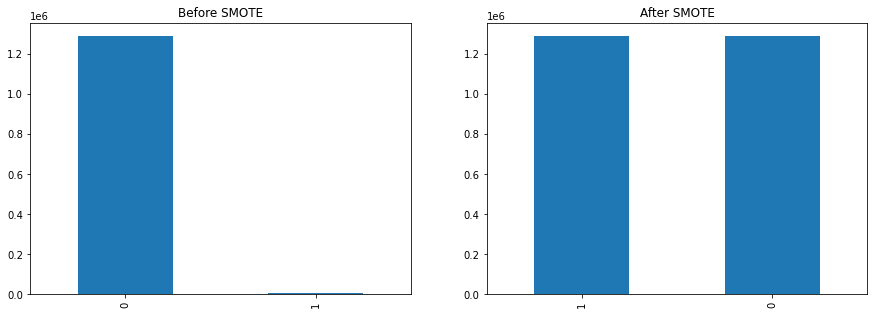

In [44]:
sm = SMOTE()
x_train_new,y_train_new = sm.fit_resample(x_train,y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [45]:
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())

In [46]:
scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model 1 Logistic Regression

[[550608   2229]
 [   303   2605]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.54      0.90      0.67      2908

    accuracy                           1.00    555745
   macro avg       0.77      0.95      0.84    555745
weighted avg       1.00      1.00      1.00    555745



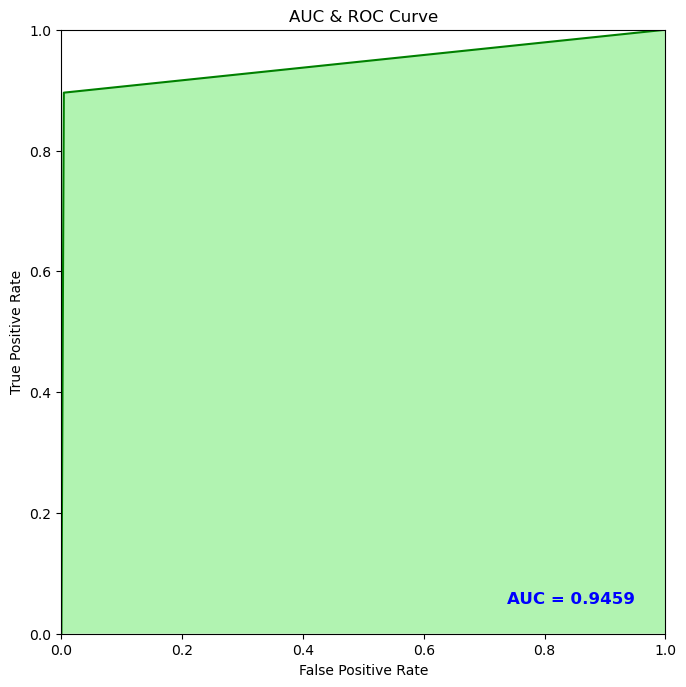

In [57]:
#Logistic Regression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_test_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

auc = metrics.roc_auc_score(y_test, y_test_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_test_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 2 Gaussian Naive Bayes

[[550220   2617]
 [   417   2491]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.49      0.86      0.62      2908

    accuracy                           0.99    555745
   macro avg       0.74      0.93      0.81    555745
weighted avg       1.00      0.99      1.00    555745



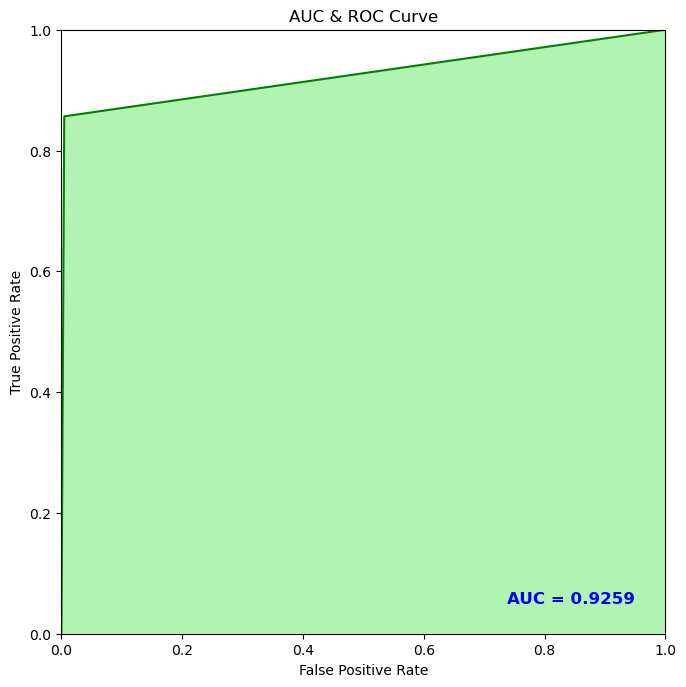

In [58]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)

print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))

auc = metrics.roc_auc_score(y_test, gnb_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, gnb_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 3 Decision Tree

In [51]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_pred = dtree.predict(x_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[552258    579]
 [   318   2590]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.82      0.89      0.85      2908

    accuracy                           1.00    555745
   macro avg       0.91      0.94      0.93    555745
weighted avg       1.00      1.00      1.00    555745



## Model 4 Random Forest

[[552536    301]
 [   305   2603]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.90      0.90      0.90      2908

    accuracy                           1.00    555745
   macro avg       0.95      0.95      0.95    555745
weighted avg       1.00      1.00      1.00    555745



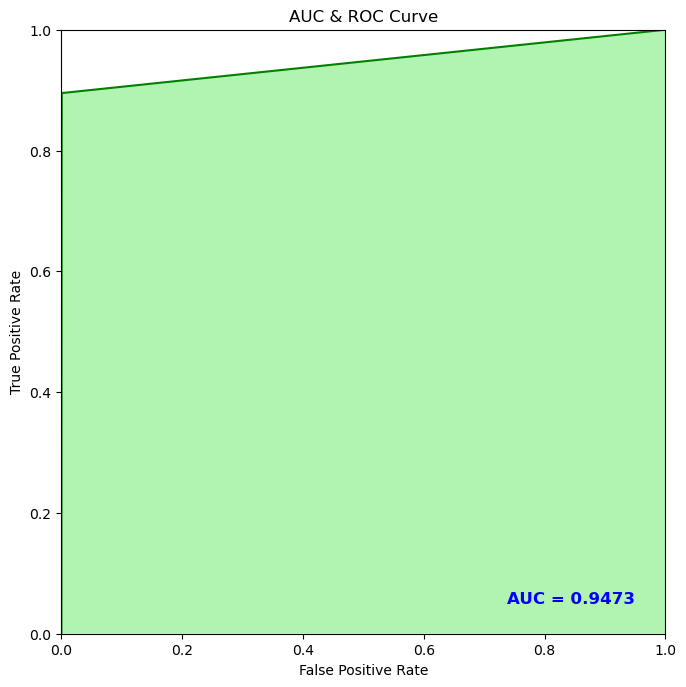

In [59]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

auc = metrics.roc_auc_score(y_test, rfc_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, rfc_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 5 Decision Tree with Adaptive boosting

[[550053   2784]
 [   199   2709]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552837
           1       0.49      0.93      0.64      2908

    accuracy                           0.99    555745
   macro avg       0.75      0.96      0.82    555745
weighted avg       1.00      0.99      1.00    555745



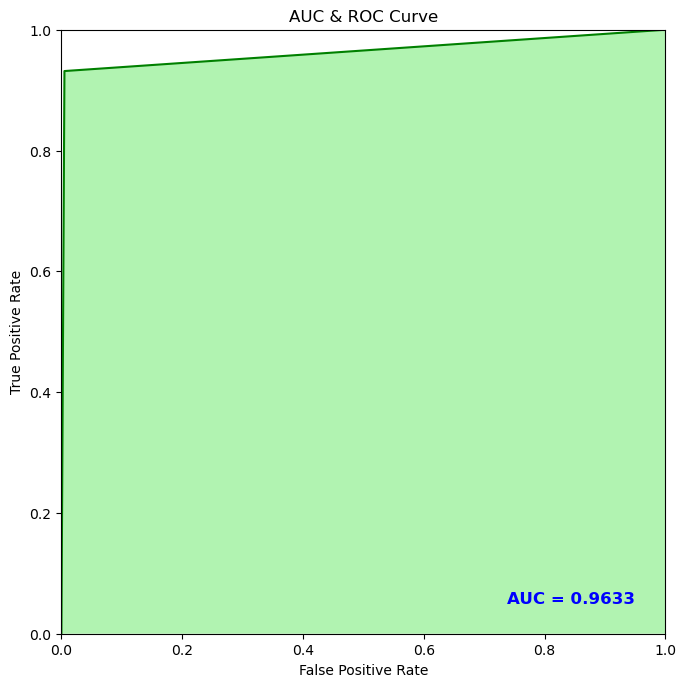

In [60]:
#AdaBoost
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(x_train,y_train)
adabc_pred = adabc.predict(x_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

auc = metrics.roc_auc_score(y_test, adabc_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, adabc_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 6 Decision Tree with bagging

[[552460    377]
 [   316   2592]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.87      0.89      0.88      2908

    accuracy                           1.00    555745
   macro avg       0.94      0.95      0.94    555745
weighted avg       1.00      1.00      1.00    555745



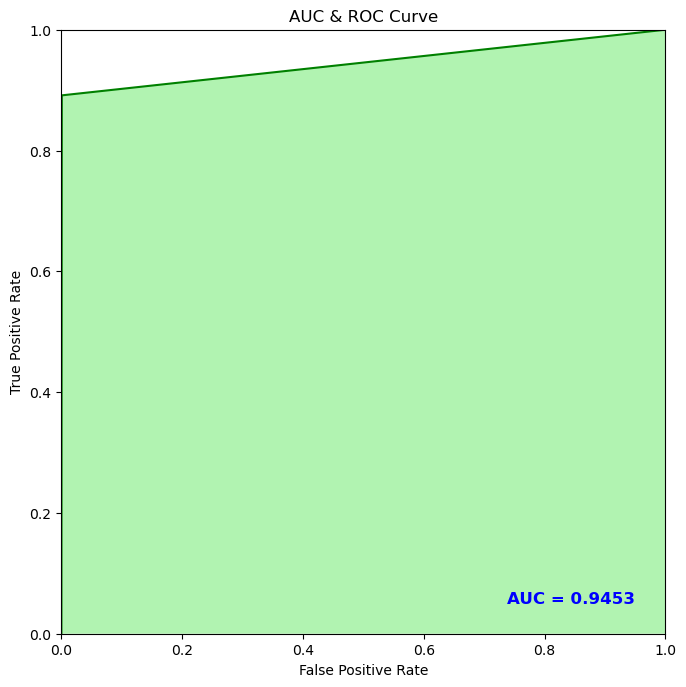

In [61]:
#Bagging
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(x_train,y_train)
bgc_pred = bgc.predict(x_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

auc = metrics.roc_auc_score(y_test, bgc_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, bgc_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Model 7 XGBoost

In [63]:
#Gradient Boosting Tress - Model Training
import sys
!{sys.executable} -m pip install xgboost

[19:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[551457   1380]
 [   182   2726]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.66      0.94      0.78      2908

    accuracy                           1.00    555745
   macro avg       0.83      0.97      0.89    5

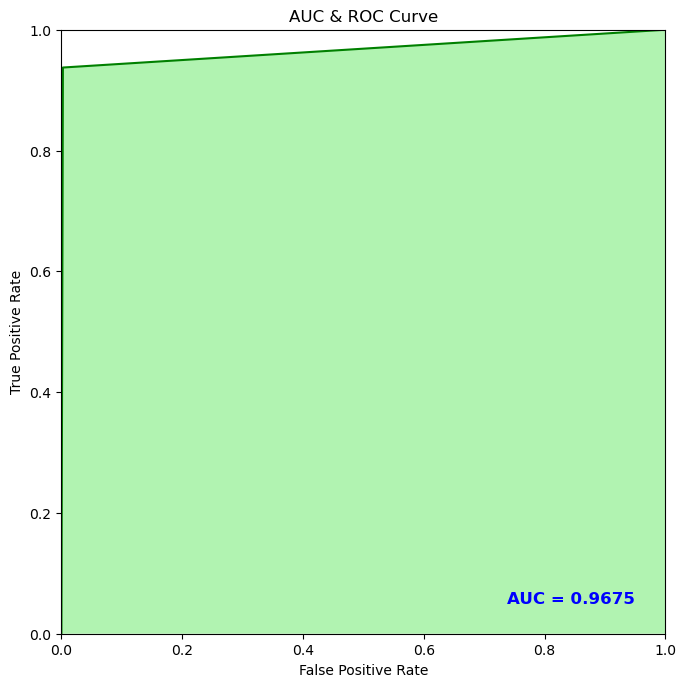

In [65]:
#Building XG Boost Model
from xgboost import XGBClassifier

#fit model to training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(x_train, y_train)

xbt_pred = xbt_model.predict(x_test)

print(confusion_matrix(y_test,xbt_pred))
print('\n')
print(classification_report(y_test,xbt_pred))

auc = metrics.roc_auc_score(y_test, xbt_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, xbt_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## KNN

[[550472   2365]
 [   218   2690]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.53      0.93      0.68      2908

    accuracy                           1.00    555745
   macro avg       0.77      0.96      0.84    555745
weighted avg       1.00      1.00      1.00    555745



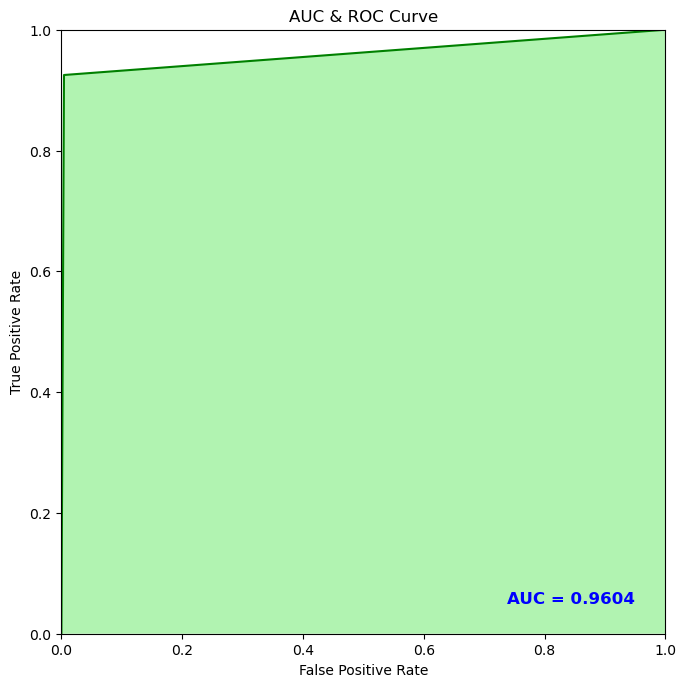

In [59]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

auc = metrics.roc_auc_score(y_test, knn_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, knn_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import AUC

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau

import keras_tuner
from keras_tuner.engine.hyperparameters import HyperParameter

from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras_tuner'

In [47]:
n_cols = x_train.shape[1]

In [48]:
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
AUPRC = AUC(curve = "PR")
model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2,1e-3])), loss = 'binary_crossentropy', metrics = ['accuracy',AUPRC])

NameError: name 'hp' is not defined